<h1>EOSC 442 - Final Project</h1>
Members: Isaiah Youm, Bernice Huynh, Ting Gu, Yicheng Ma


In [3]:
# Import libraries to manage data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

<hr>
<h3>List of Functions Used</h3>

In [4]:
# Converts year and month gathered from dataset into datetime
def convert_to_datetime(year:str, month:str, index:int, DataFrame:pd.DataFrame) -> datetime.date:
    """
    year = Name of Column of Year in String (Column from DataFrame)\n
    month = Name of Column of Month in String (Column from DataFrame)\n
    index = the iteration number in a loop\n
    DataFrame = the target pandas.DataFrame\n
    """
    years = str(int(DataFrame.iloc[index][year]))
    months = str(int(DataFrame.iloc[index][month]))
    form_prep = years+'/'+months
    date_time = datetime.strptime(form_prep, '%Y/%m')

    return date_time

<hr>
<h3> Setting up Data for Ice Extent </h3>

The csv file for the ice-extent data are separated by 12 months, which have their respective years from 1979 to 2022.
The year and month, however, are separated and do not have a proper index.
Therefore, when setting up this data, combining the month and year to a useable DateTime index is necessary.

<strong> Throughout this data analysis, all DateTime index should be in the form of YYYY-MM-01 </strong>

Missing values are noted with value -9999

In [5]:
# Setting-up data for Ice-Extent.
# NOTE: The csv file for the ice-extent data are separated by 12 months, which have their respective years from 1979 to 2022


# Create an empty DataFrame for the Ice-Extent data.
# Initiailizing the column names, because the pd.concat() function only works with data
# that have the same parameters/columns.
ice_extent = pd.DataFrame()

# For-loop through the twelve datasets
for num in range(1, 13):
    if num < 10:
        relative_file_path = f'./Ice Extent/N_0{num}_extent_v3.0.csv'
    else:
        relative_file_path = f'./Ice Extent/N_{num}_extent_v3.0.csv'
    data_point = pd.read_csv(relative_file_path, delimiter=',\s+', engine='python')
    # print(data_point)
    ice_extent = pd.concat([ice_extent, data_point], sort=True)

##############

# Have to change the ice_extent data to index it by YYYY_MM

# To do this, we first need to grab the year and mo to DateTime format.
datetime_iceextent = []
for num in range(0, len(ice_extent)):
    date_time = convert_to_datetime('year', 'mo', num, ice_extent)
    datetime_iceextent.append(date_time)

# Add list of datetime made to the Ice Extent DataFrame as 'DateTime'
ice_extent['DateTime'] = datetime_iceextent

# Set using pandas.DataFrame.set_index(column_name)
ice_extent = ice_extent.set_index('DateTime')

# Sort the data by DateTime (ascending chronological order)
ice_extent = ice_extent.sort_index()

# Delete redundant columns (year and mo in this case)
ice_extent = ice_extent.drop('year', axis=1)
ice_extent = ice_extent.drop('mo', axis=1)

# Create the DataFrame for the ice extent
raw_extent = ice_extent['extent']
mask_extent = raw_extent != -9999
extent = raw_extent[mask_extent]

# Create the DataFrame for the ice area
ice_area = ice_extent['area']

<hr>
<h3> Setting up Data for Ice Thickness</h3>

<h5>Data Parameters:</h6>
<hr>
<pre>
AIR-EM_summaries:

- Parameters:
'Year' 'Month' 'Lat' 'Lon' 'Avg_thkns' 'Min_thkns' 'Max_thkns' 'SD_thkns'
- Data Range: 
2001 ~ 2005
- Missing Values:
-999.00, +-0.00 (Min_thkns)
</pre>
<hr>
<pre>
CanCoast_summaries:

- Parameters:
'Year' 'Month' 'Lat' 'Lon' 'Avg_thkns' 'Min_thkns' 'Max_thkns' 'SD_thkns' 'Avg_snow' 'Min_snow' 'Max_snow' 'SD_snow'
- Data Range:
1947 ~ 2013
- Missing Value: 
-999.00
</pre>
<hr>
<pre>
CryoSat-AWI_summaries:

- Parameters:
'Year' 'Month' 'Lat' 'Lon' 'Avg_thkns' 'Min_thkns' 'Max_thkns' 'SD_thkns'
- Data Range:
2010 ~ 2016
- Missing Value:
-999
</pre>
<hr>
<pre>
IceBridge-QL.summaries:

- Parameters:
'Year' 'Month' 'Lat' 'Lon' 'Avg_thkns' 'Min_thkns' 'Max_thkns' 'SD_thkns' 'Avg_snow' 'Min_snow' 'Max_snow' 'SD_snow'
- Data Range:
2012 ~ 2015
</pre>
<hr>
<pre>
IceBridge-V2.summaries:

- Parameters:
'Year' 'Month' 'Lat' 'Lon' 'Avg_thkns' 'Min_thkns' 'Max_thkns' 'SD_thkns' 'Avg_snow' 'Min_snow' 'Max_snow' 'SD_snow'
- Data Range:
2009 ~ 2013
</pre>
<hr>
<pre>
ICESAT1-G_summaries:

- Parameters:
'Year' 'Month' 'Lat' 'Lon' 'Avg_thkns' 'Min_thkns' 'Max_thkns' 'SD_thkns'
- Data Range:
2003 ~ 2008
- Missing Value:
-999.00, +-0.00 (Min_thkns)
</pre>
<hr>
<pre>
ICESAT1-SH_summaries:

- Parameters:
'Year' 'Month' 'Lat' 'Lon' 'Avg_thkns' 'Min_thkns' 'Max_thkns' 'SD_thkns'
- Data Range:
2003 ~ 2008
- Missing Value:
-999.00, -5.00 & 0.00 (Min_thkns)
</pre>

In [6]:
# Setting-up data for Ice Thickness
# There are multiple data sets that we need to add together.
# We will make a DataFrame and designate a common parameter for all of them, then add all the data together.
# (Because pd.concat() only works if the columns are the same)

# Create empty DataFrame that will store all of the data
ice_thickness = pd.DataFrame()

# Create a list that contains the name of the text files we'll iterate.
ice_thickness_names = ['./Ice Thickness/AIR-EM_summaries.txt', './Ice Thickness/CanCoast_summaries.txt', './Ice Thickness/CryoSat-AWI_summaries.txt', './Ice Thickness/IceBridge-QL.summaries.txt', './Ice Thickness/IceBridge-V2.summaries.txt', './Ice Thickness/ICESAT1-G_summaries.txt', './Ice Thickness/ICESAT1-SH_summaries.txt']


# Compound all of the data together
for csvnames in ice_thickness_names:
    df = pd.read_csv(csvnames, usecols=[3, 7, 8, 9, 24, 25, 26, 27], sep='\s+', engine='python')
    ice_thickness = pd.concat([ice_thickness, df], sort=True)

# Have to change data to index it by YYYY_MM
datetime_icethkness = []
for num in range(0, len(ice_thickness)):
    date_time = convert_to_datetime('Year', 'Month', num, ice_thickness)
    datetime_icethkness.append(date_time)
ice_thickness['DateTime'] = datetime_icethkness

# Set index to DateTime
ice_thickness = ice_thickness.set_index('DateTime')


# Sort the data by DateTime (ascending chronological order)
ice_thickness = ice_thickness.sort_index()

# Delete the Year and Month columns as they are now unnecessary
ice_thickness = ice_thickness.drop('Year', axis=1)
ice_thickness = ice_thickness.drop('Month', axis=1)

# Masking Missing Values from Min_thkns. Refer to Above to check missing values.
min_thkns = ice_thickness['Min_thkns']
mask_min_thkns = min_thkns > 0
min_thkns = min_thkns[mask_min_thkns]

# Creating Average Thickness DataFrame:
avg_thkns = ice_thickness['Avg_thkns']

# Creating Max Thickness DataFrame:
max_thkns = ice_thickness['Max_thkns']

# Creating the SD Thickness DataFrame:
sd_thkns = ice_thickness['SD_thkns']

# Creating the lattitude DataFrame for ice thickness:
lat_thkns = ice_thickness['Lat']


<hr>
<h3> Setting up Data for Precipitation </h3>

<strong>cmap-mean.csv</strong> has LOTS of data that are unnecessary for this data analysis.

We only need data from lat 60 to 90 since that's the average lattitude we're searching for.
This is because the Arctic is around 76' latttiude, and we want some leniency in the collection of our data.
Therefore, we gather from 60' lat to 90' lat.

In [7]:
# Setting up data for Precipitation

# Reading the raw cmap-means.csv.
# Objective: Filter out all data outside of lattitude 60 ~ 90
precipitation = pd.read_csv('./Precipitation/cmap-mean.csv')
print(f"{len(precipitation)} = total number of data in original csv file.")


# There's more data thats outside of the 60 ~ 90 range. 
# To optimize the code, it is better to make the if condition 60 and below.

for num in range(0, len(precipitation)):
    if precipitation.iloc[num]['lat'] < 60:
        precipitation = precipitation[:num]

        break

print(f"{len(precipitation)} = the number of leftover data-points after filter")

# Need to set the YYYY-MM-DD as the index for the precipitation data.
# Doing this now, because iterating through a DateTime is difficult for the procedures above.
# We'll leave an unindexed version of the data in case we need to use the time as a column.
precipitation['time'] = pd.to_datetime(precipitation['time'])
precipitation_unindexed = precipitation
precipitation = precipitation.set_index('time')

# Sort the data by DateTime (ascending chronological order)
precipitation = precipitation.sort_index()

# Create DataFrame for the precipitation
precip_data = precipitation['precip']

# Create lattitude data for the precipitation
lat_precip = precipitation['lat']

5432832 = total number of data in original csv file.
905472 = the number of leftover data-points after filter


<h4 style='color:cyan;'> Only run this code if you need to save a new .csv file (with <strong>filtered</strong> data from <strong>cmap-mean.csv</strong>))</h4>

Export to a csv file with wanted range of data. <br>
Un-necessary, but am doing this so we don't have a humongous data set to download.<br>
<p><code>precipitation.to_csv("./Precipitation/filtered_precipitation_data.csv", index=False)</code></p>

<hr>
<h3>Extracted Data List</h3>
Information attained from each respective documentation.

<pre>
<p></p>
<strong>Ice Extent (1979 - 2021)</strong>
Ice Extent                 extent               M * km^2 (millions sq km)
    + Mask:                mask_extent
Ice Area                   ice_area             M * km^2 (millions sq km)
<p></p>
<hr>
<strong>Ice Thickness</strong>
Average Ice Thickness      avg_thkns            m (meters)
Max Ice Thickness          max_thkns            m (meters)
Min Ice Thickness          min_thkns            m (meters)
    + Mask:                mask_min_thkns
SD Ice Thickness           sd_thkns             m (meters)
Lat for Ice Thickness      lat_thkns            lat (N)
<p></p>
<hr>
<strong>Precipitation</strong>
Precipitation              precip_data          mm / day
Lat for Precipitation      lat_precip           lat (N) 


precipitation_unindexed = Time left in columns of DataFrame
<p></p>
</pre>

<h3>Raw Data - Ice Extent Scatterplot</h3>

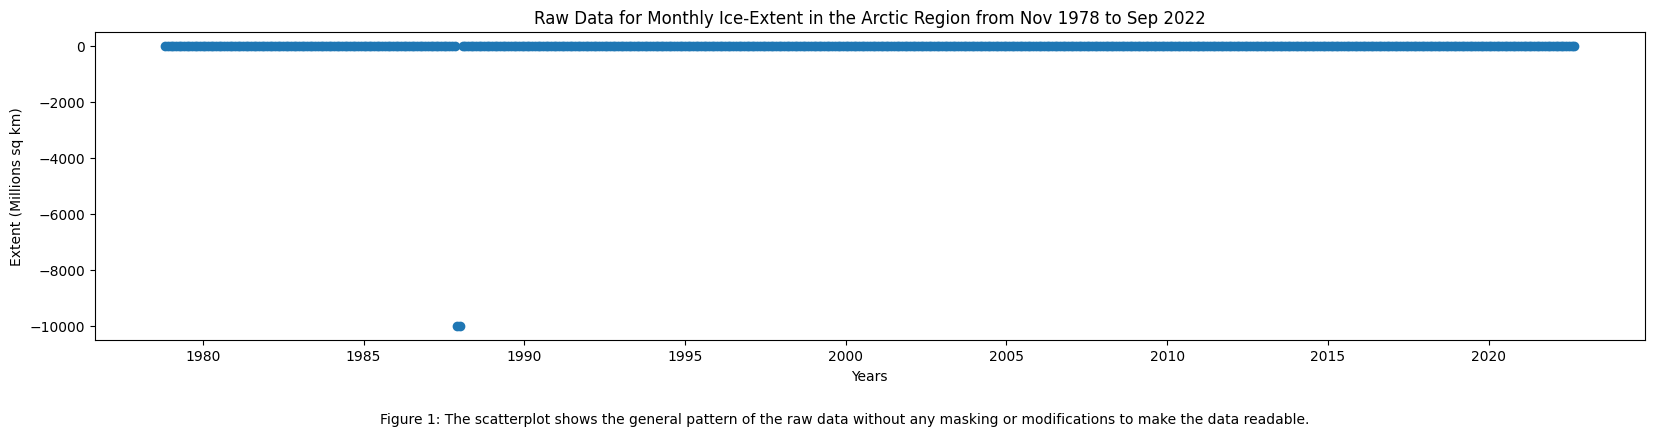

In [8]:
## PLOTTING RAW DATA TO A SCATTERPLOT TO UNDERSTAND THE OVERLAY OF IT BETTER.

plt.figure(figsize=(20, 4))
plt.scatter(raw_extent.index, raw_extent)
plt.xlabel("Years")
plt.ylabel("Extent (Millions sq km)")
plt.title("Raw Data for Monthly Ice-Extent in the Arctic Region from Nov 1978 to Sep 2022")
plt.figtext(0.5, -0.1, "Figure 1: The scatterplot shows the general pattern of the raw data without any masking or modifications to make the data readable."
            , wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

<h3>Raw Data - Ice Thickness Scatterplot</h3>

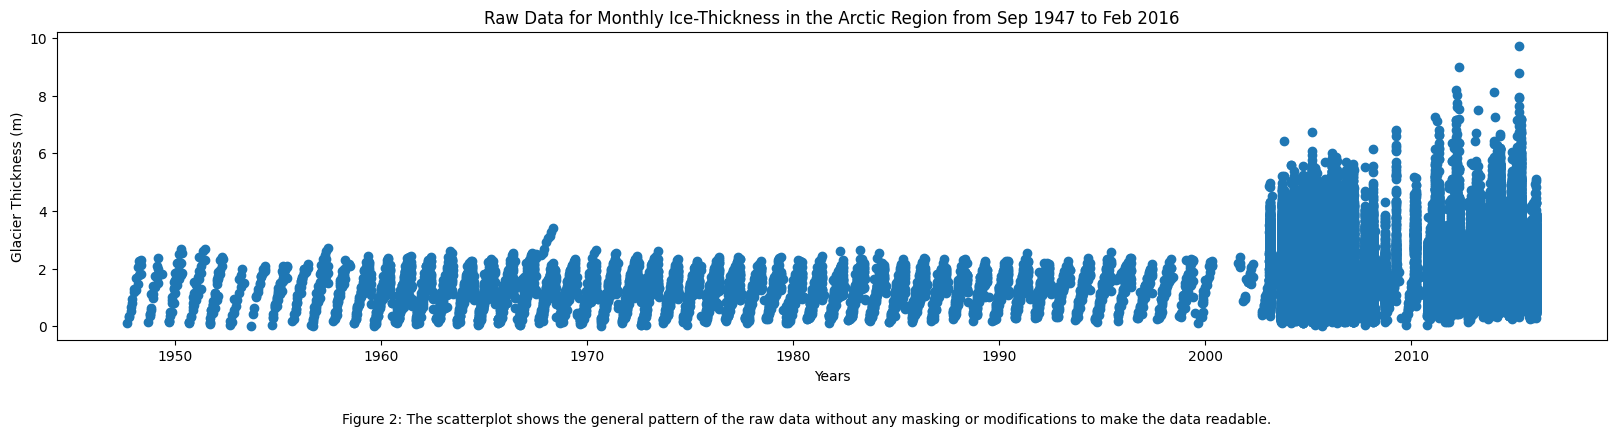

In [9]:
## PLOTTING RAW DATA TO A SCATTERPLOT TO UNDERSTAND THE OVERLAY OF IT BETTER.

plt.figure(figsize=(20, 4))
plt.scatter(avg_thkns.index, avg_thkns)
plt.xlabel("Years")
plt.ylabel("Glacier Thickness (m)")
plt.title("Raw Data for Monthly Ice-Thickness in the Arctic Region from Sep 1947 to Feb 2016")
plt.figtext(0.5, -0.1, "Figure 2: The scatterplot shows the general pattern of the raw data without any masking or modifications to make the data readable."
            , wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

<h3>Raw Data - Rainfall Scatterplot</h3>

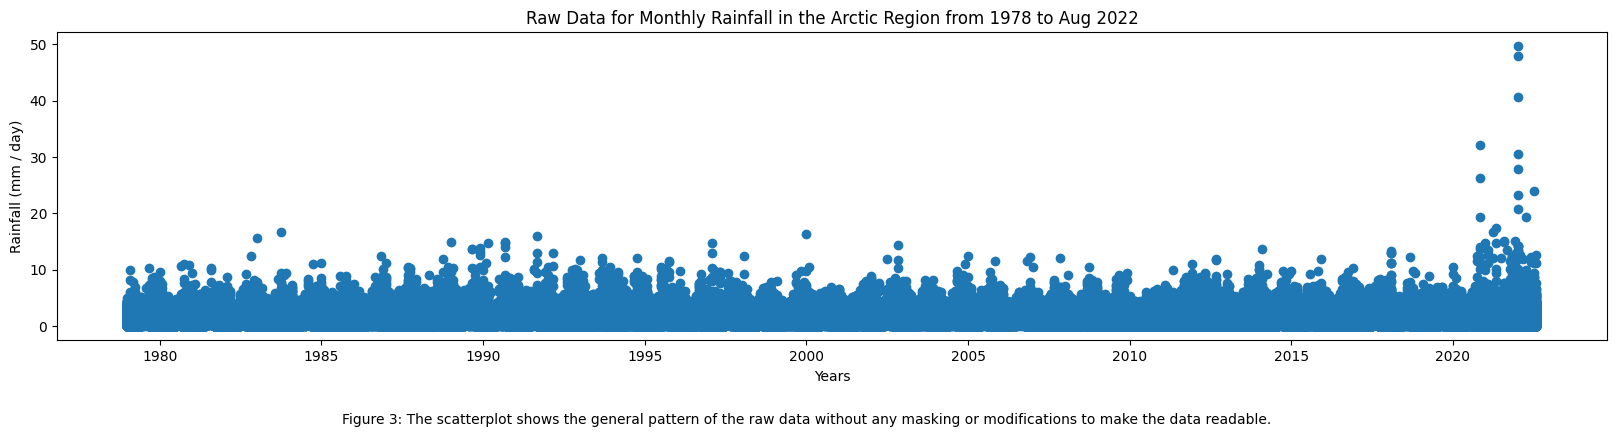

In [10]:
## PLOTTING RAW DATA TO A SCATTERPLOT TO UNDERSTAND THE OVERLAY OF IT BETTER.

plt.figure(figsize=(20, 4))
plt.scatter(precip_data.index, precip_data)
plt.xlabel("Years")
plt.ylabel("Rainfall (mm / day)")
plt.title("Raw Data for Monthly Rainfall in the Arctic Region from 1978 to Aug 2022")
plt.figtext(0.5, -0.1, "Figure 3: The scatterplot shows the general pattern of the raw data without any masking or modifications to make the data readable."
            , wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

<h3>Data Analysis - Ice Extent Graph</h3>

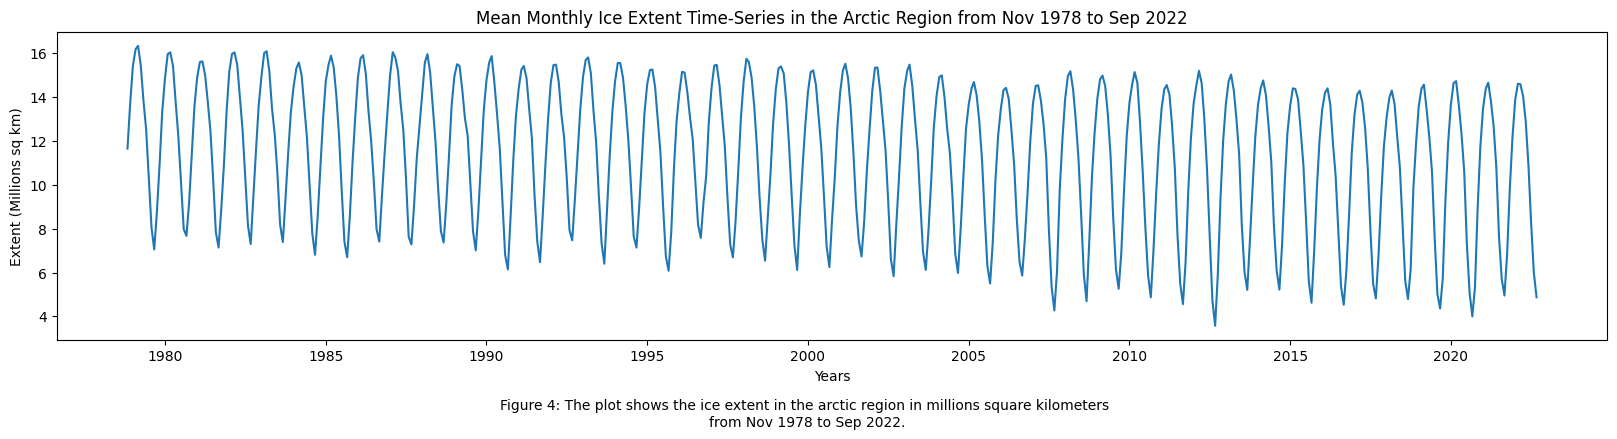

In [11]:
## MEAN MONTHLY TIME-SERIES OF ICE EXTENT IN THE ARCTIC REGION

plt.figure(figsize=(20, 4))
plt.plot(extent)
plt.xlabel("Years")
plt.ylabel("Extent (Millions sq km)")
plt.title("Mean Monthly Ice Extent Time-Series in the Arctic Region from Nov 1978 to Sep 2022")
plt.figtext(0.5, -0.1, "Figure 4: The plot shows the ice extent in the arctic region in millions square kilometers \n"
                        + "from Nov 1978 to Sep 2022."
            , wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

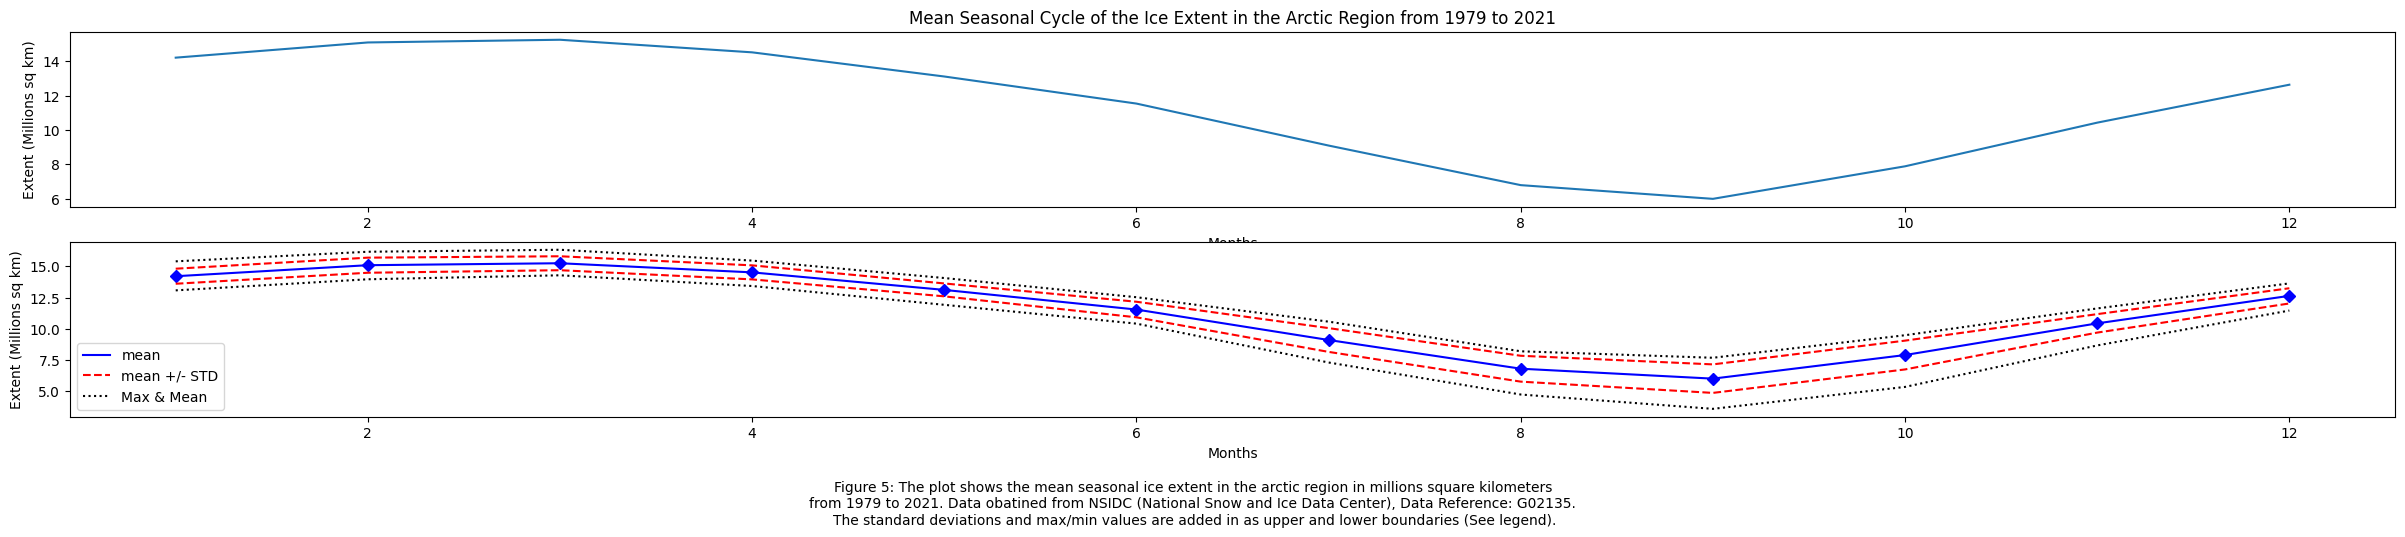

In [42]:
## MEAN SEASONAL CYCLE OF ARCTIC ICE-EXTENT

# Need to mask the missing values from the DataFrame.
monthly_ice_extent = ice_extent[mask_extent]

# Need to mask unwanted date ranges from the DataFrame.
monthly_ice_extent = monthly_ice_extent[(monthly_ice_extent.index > '1978-12-01') & (monthly_ice_extent.index < '2022-01-01')]

# Get the mean of all values of each month in every year.
extent_monthly_annual_cycle = monthly_ice_extent.groupby(monthly_ice_extent.index.month)['extent'].mean()

# Get the standard deviation of the ice extent for each month in every year.
extent_std = monthly_ice_extent.groupby(monthly_ice_extent.index.month)['extent'].std()

# Get the maximum value of the ice extent for each month in every year.
extent_max = monthly_ice_extent.groupby(monthly_ice_extent.index.month)['extent'].max()

# Get the minimum value of the ice extent for each month in every year.
extent_min = monthly_ice_extent.groupby(monthly_ice_extent.index.month)['extent'].min()

# Calculate upper std boundary and lower std boundary for graph.
extent_upper_std = extent_monthly_annual_cycle + extent_std
extent_lower_std = extent_monthly_annual_cycle - extent_std

# Create Two Subplots to show a generic trend in the top graph and a more in-depth analysis on the bottom.
fig1, (ax1, ax2) = plt.subplots(2,1,figsize=[30,5])

# Subplot with general trend
ax1.plot(extent_monthly_annual_cycle)
ax1.set_title("Mean Seasonal Cycle of the Ice Extent in the Arctic Region from 1979 to 2021")
ax1.set_xlabel("Months")
ax1.set_ylabel("Extent (Millions sq km)")

# Subplot with anomalies and min/max values plotted.
ax2.plot(extent_monthly_annual_cycle, color='b', label='mean', linestyle='-')
ax2.plot(extent_monthly_annual_cycle, 'bD')
ax2.plot(extent_upper_std, color='r', label='mean +/- STD', linestyle='--')
ax2.plot(extent_lower_std, color='r', linestyle='--')
ax2.plot(extent_max, color ='k', label='Max & Mean', linestyle=':')
ax2.plot(extent_min, color ='k', linestyle=':')
ax2.set_xlabel("Months")
ax2.set_ylabel("Extent (Millions sq km)")
plt.figtext(0.5, -0.1, "Figure 5: The plot shows the mean seasonal ice extent in the arctic region in millions square kilometers \n"
                        + "from 1979 to 2021. Data obatined from NSIDC (National Snow and Ice Data Center), Data Reference: G02135. \n"
                        + "The standard deviations and max/min values are added in as upper and lower boundaries (See legend)."
            , wrap=True, horizontalalignment='center', fontsize=10)
ax2.legend()


<h3>Data Analysis - Precipitation Graph</h3>

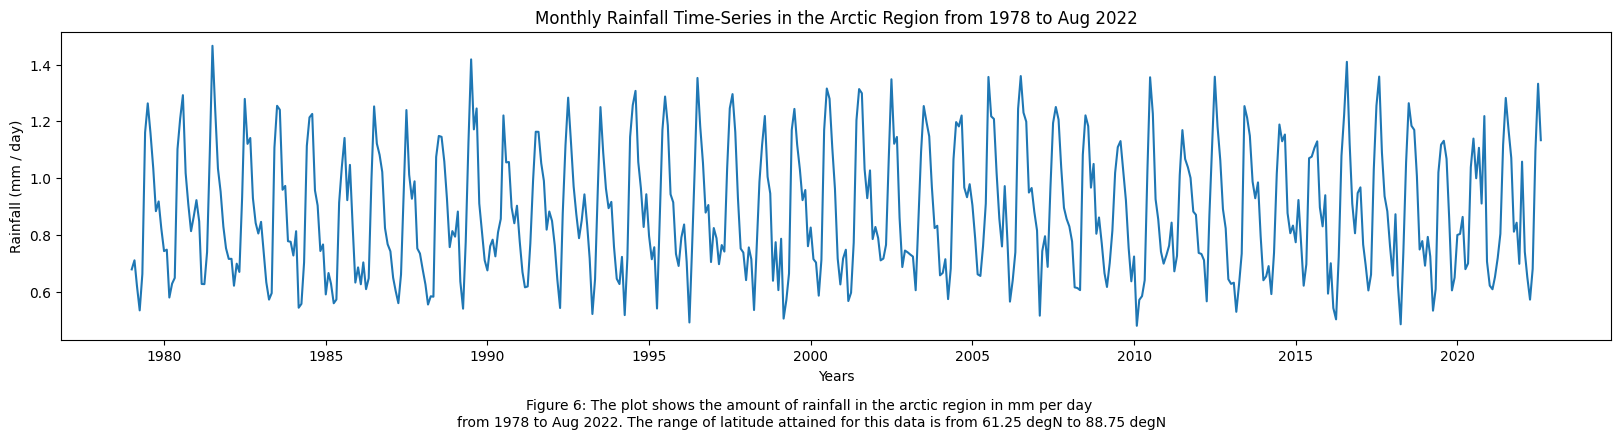

In [13]:
## MEAN MONTHLY TIME-SERIES OF PRECIPITATION IN THE ARCTIC REGION (LAT 61.25 TO LAT 88.75)

# There are TOO many values for each time point, and thus we will average all of the points.
# This is because we are also measuring data from various latitudes that we defined to be in the Arctic Region.

# Use the pd.df.groupby() function to accumulate data
precipitation_mean_monthly_values = precipitation_unindexed.groupby(precipitation_unindexed.time.dt.to_period('M')).mean()
precipitation_mean_monthly_raw = precipitation_mean_monthly_values.to_timestamp()

# Isolate the specific column of data we need, which is 'precip' in this case.
precipitation_mean_monthly = precipitation_mean_monthly_raw['precip']

plt.figure(figsize=(20, 4))
plt.plot(precipitation_mean_monthly)
plt.xlabel("Years")
plt.ylabel("Rainfall (mm / day)")
plt.title("Monthly Rainfall Time-Series in the Arctic Region from 1978 to Aug 2022")
plt.figtext(0.5, -0.1, "Figure 6: The plot shows the amount of rainfall in the arctic region in mm per day \n"
                        + "from 1978 to Aug 2022. The range of latitude attained for this data is from 61.25 degN to 88.75 degN"
            , wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

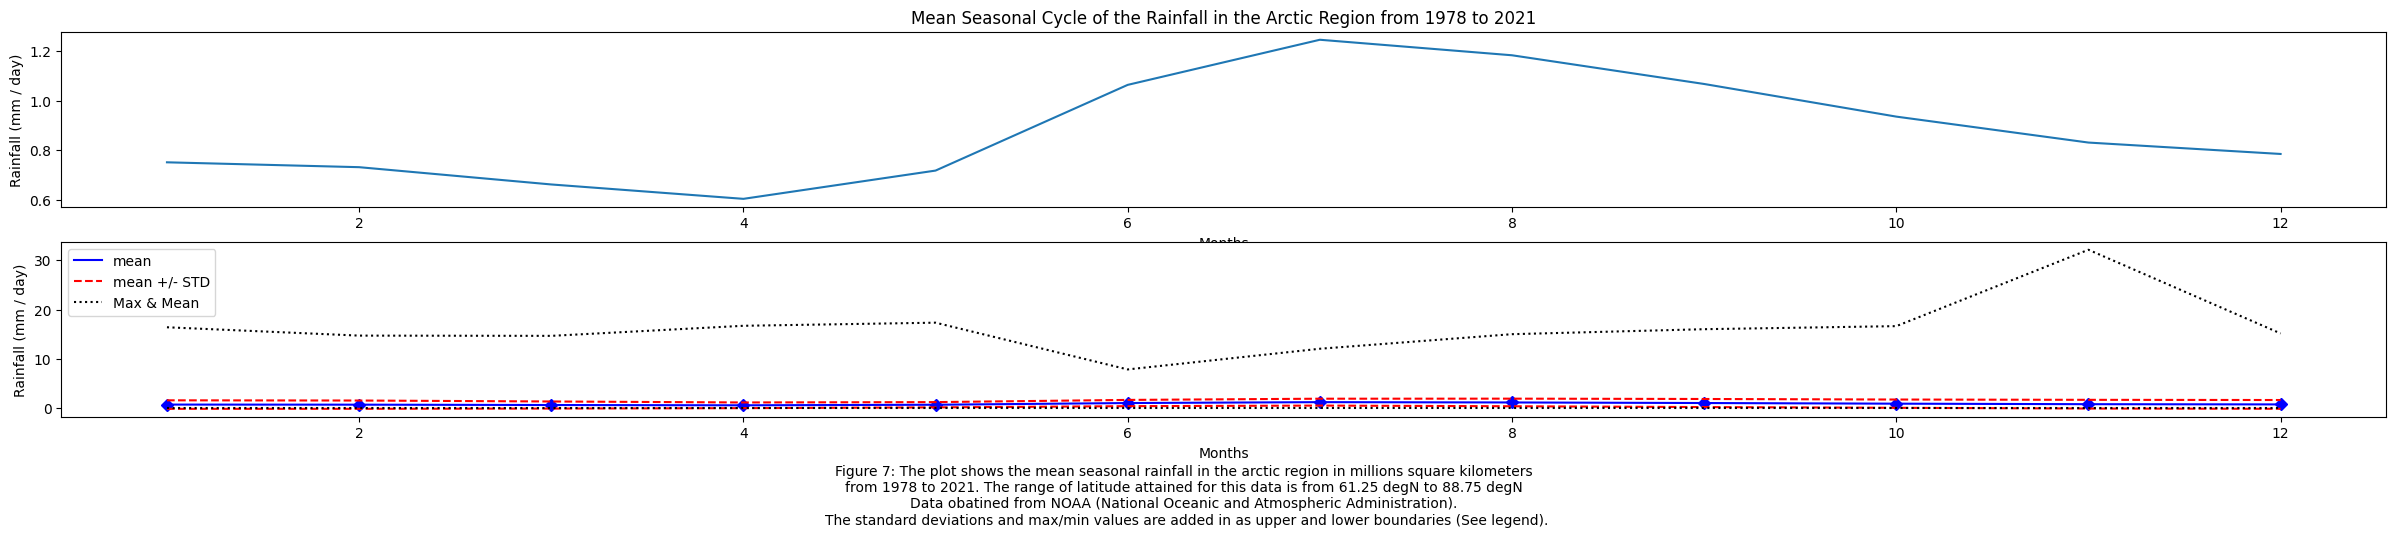

In [36]:
## MEAN SEASONAL CYCLE OF PRECIPITATION IN THE ARCTIC REGION (LAT 61.25 TO LAT 88.75)


# Need to mask unwanted date ranges from the DataFrame.
monthly_precip = precipitation[(precipitation.index < '2022-01-01')]

# Get the mean of all values of each month in every year.
precip_monthly_annual_cycle = monthly_precip.groupby(monthly_precip.index.month)['precip'].mean()

# Get the standard deviation of the precipitation for each month in every year.
precip_std = monthly_precip.groupby(monthly_precip.index.month)['precip'].std()

# Get the maximum value of the precipitation for each month in every year.
precip_max = monthly_precip.groupby(monthly_precip.index.month)['precip'].max()

# Get the minimum value of the precipitation for each month in every year.
precip_min = monthly_precip.groupby(monthly_precip.index.month)['precip'].min()

# Calculate upper std boundary and lower std boundary for graph.
precip_upper_std = precip_monthly_annual_cycle + precip_std
precip_lower_std = precip_monthly_annual_cycle - precip_std

# Create Two Subplots to show a generic trend in the top graph and a more in-depth analysis on the bottom.
fig2, (ax3, ax4) = plt.subplots(2,1,figsize=[30, 5])

# Subplot with general trend.
ax3.plot(precip_monthly_annual_cycle)
ax3.set_xlabel("Months")
ax3.set_ylabel("Rainfall (mm / day)")
ax3.set_title("Mean Seasonal Cycle of the Rainfall in the Arctic Region from 1978 to 2021")

# Subplot with anomalies and min/max values plotted.
ax4.plot(precip_monthly_annual_cycle, color='b', label='mean', linestyle='-')
ax4.plot(precip_monthly_annual_cycle, 'bD')
ax4.plot(precip_upper_std, color='r', label='mean +/- STD', linestyle='--')
ax4.plot(precip_lower_std, color='r', linestyle='--')
ax4.plot(precip_max, color ='k', label='Max & Mean', linestyle=':')
ax4.plot(precip_min, color ='k', linestyle=':')
ax4.set_xlabel("Months")
ax4.set_ylabel("Rainfall (mm / day)")
plt.figtext(0.5, -0.1,  "Figure 7: The plot shows the mean seasonal rainfall in the arctic region in millions square kilometers \n" +
                        "from 1978 to 2021. The range of latitude attained for this data is from 61.25 degN to 88.75 degN \n" +
                        "Data obatined from NOAA (National Oceanic and Atmospheric Administration). \n" +
                        "The standard deviations and max/min values are added in as upper and lower boundaries (See legend).",
            wrap=True, horizontalalignment='center', fontsize=10)
ax4.legend()



<h3>Data Analysis - Ice Thickness Graph</h3>

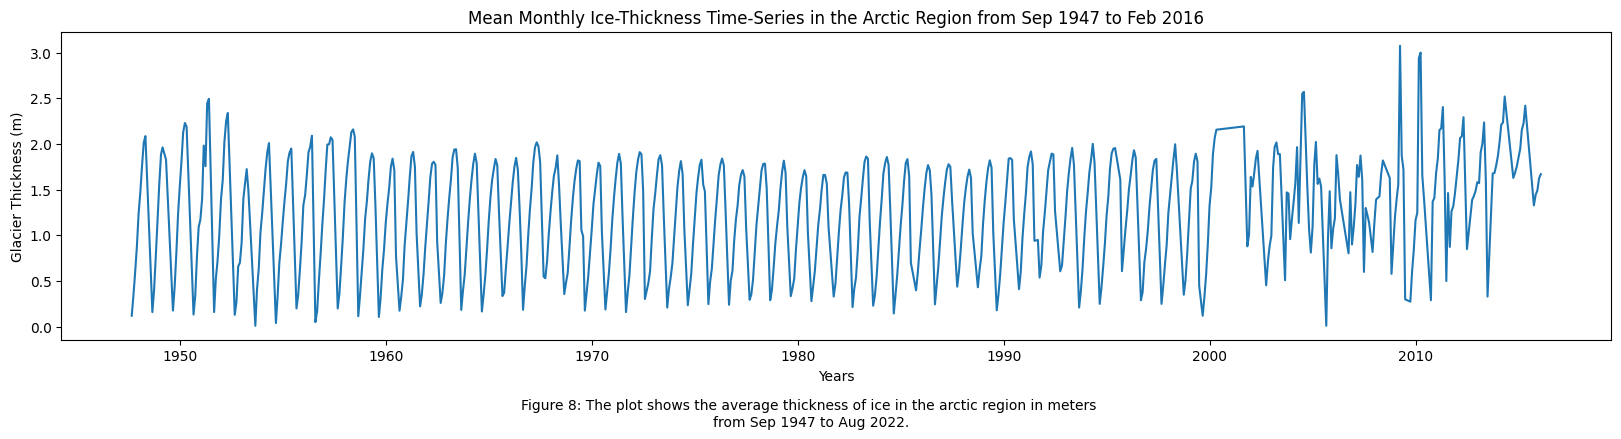

In [15]:
## MEAN MONTHLY TIME-SERIES OF ICE THICKNESS IN THE ARCTIC REGION

# Use the pd.df.groupby() function to accumulate data
avg_thkns_mean_monthly_values = avg_thkns.groupby(avg_thkns.index.to_period('M')).mean()
avg_thkns_mean_monthly = avg_thkns_mean_monthly_values.to_timestamp()

plt.figure(figsize=(20, 4))
plt.plot(avg_thkns_mean_monthly)
plt.xlabel("Years")
plt.ylabel("Glacier Thickness (m)")
plt.title("Mean Monthly Ice-Thickness Time-Series in the Arctic Region from Sep 1947 to Feb 2016")
plt.figtext(0.5, -0.1, "Figure 8: The plot shows the average thickness of ice in the arctic region in meters \n"
                        + "from Sep 1947 to Aug 2022."
            , wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

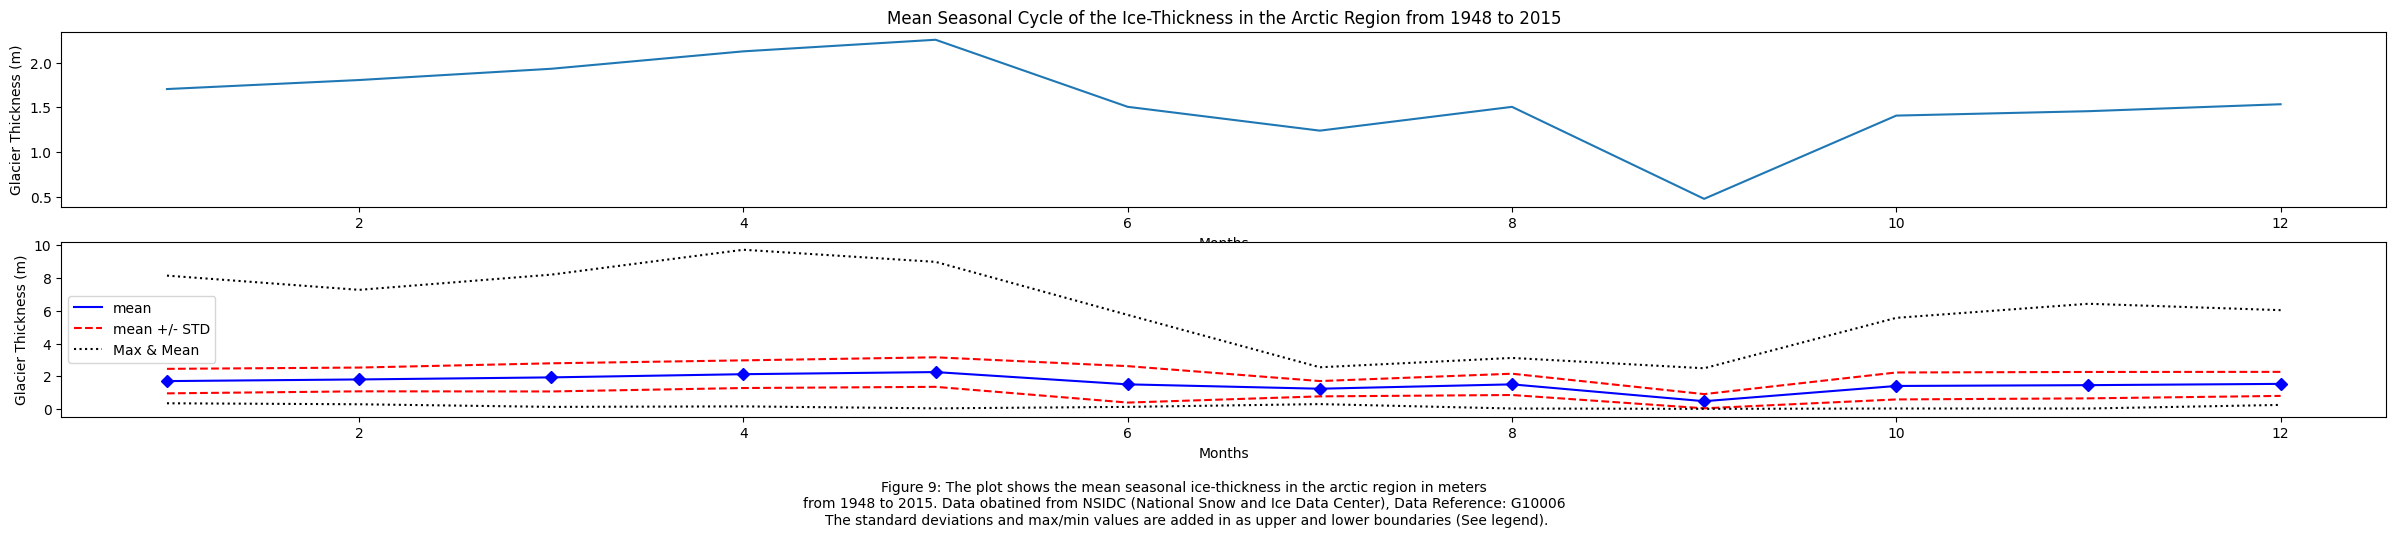

In [41]:
## MEAN SEASONAL CYCLE OF ICE-THICKNESS IN THE ARCTIC REGION

# Need to mask unwanted date ranges from the DataFrame.
ice_thickness_masked = ice_thickness[(ice_thickness.index > '1947-12-01') & (ice_thickness.index < '2016-01-01')]

# Get the mean of all values of each month in every year.
avg_thkns_seasonal_mean = ice_thickness_masked.groupby(ice_thickness_masked.index.month)['Avg_thkns'].mean()

# Get the standard deviation of the average thickness for each month in every year.
avg_thkns_std = ice_thickness_masked.groupby(ice_thickness_masked.index.month)['Avg_thkns'].std()

# Get the maximum value of the average ice thickness for each month in every year.
avg_thkns_max = ice_thickness_masked.groupby(ice_thickness_masked.index.month)['Avg_thkns'].max()

# Get the minimum value of the average ice thickness for each month in every year.
avg_thkns_min = ice_thickness_masked.groupby(ice_thickness_masked.index.month)['Avg_thkns'].min()

# Calculate upper std boundary and lower std boundary for graph.
avg_thkns_upper_std = avg_thkns_seasonal_mean + avg_thkns_std
avg_thkns_lower_std = avg_thkns_seasonal_mean - avg_thkns_std

# Create Two Subplots to show a generic trend in the top graph and a more in-depth analysis on the bottom.
fig3, (ax5, ax6) = plt.subplots(2,1,figsize=[30, 5])

# Subplot with general trend.
ax5.plot(avg_thkns_seasonal_mean)
ax5.set_xlabel("Months")
ax5.set_ylabel("Glacier Thickness (m)")
ax5.set_title("Mean Seasonal Cycle of the Ice-Thickness in the Arctic Region from 1948 to 2015")

# Subplot with anomalies and min/max values plotted
ax6.plot(avg_thkns_seasonal_mean, color='b', label='mean', linestyle='-')
ax6.plot(avg_thkns_seasonal_mean, 'bD')
ax6.plot(avg_thkns_upper_std, color='r', label='mean +/- STD', linestyle='--')
ax6.plot(avg_thkns_lower_std, color='r', linestyle='--')
ax6.plot(avg_thkns_max, color ='k', label='Max & Mean', linestyle=':')
ax6.plot(avg_thkns_min, color ='k', linestyle=':')
ax6.set_xlabel("Months")
ax6.set_ylabel("Glacier Thickness (m)")
plt.figtext(0.5, -0.1, "Figure 9: The plot shows the mean seasonal ice-thickness in the arctic region in meters \n" +
                       "from 1948 to 2015. Data obatined from NSIDC (National Snow and Ice Data Center), Data Reference: G10006 \n" +
                       "The standard deviations and max/min values are added in as upper and lower boundaries (See legend).",
            wrap=True, horizontalalignment='center', fontsize=10)
ax6.legend()


<hr>

<h3>Statistical Analysis</h3>

<h4>Importing Statistical Analysis Packages</h4>

In [17]:
import scipy.stats as stat
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression